In [34]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [3]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_set.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

0    549
1    342
Name: Survived, dtype: int64


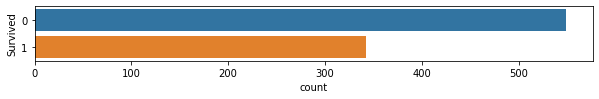

In [9]:
print(train_set.Survived.value_counts())
fig = plt.figure(figsize=(10,1))
sns.countplot(y='Survived', data=train_set)

3    491
1    216
2    184
Name: Pclass, dtype: int64


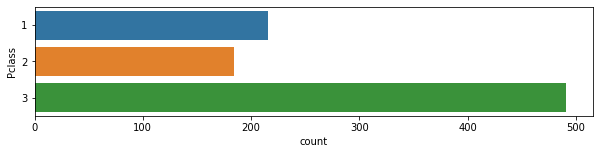

In [10]:
print(train_set.Pclass.value_counts())
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Pclass', data=train_set)

male      577
female    314
Name: Sex, dtype: int64


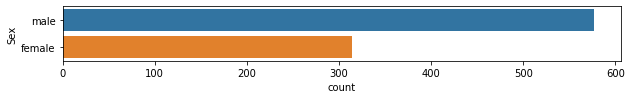

In [11]:
print(train_set.Sex.value_counts())
fig = plt.figure(figsize=(10,1))
sns.countplot(y='Sex', data=train_set)

In [12]:
train_set.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


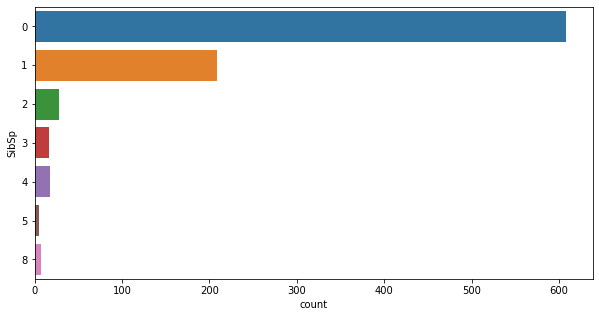

In [13]:
print(train_set.SibSp.value_counts())
fig = plt.figure(figsize=(10,5))
sns.countplot(y='SibSp', data=train_set)

In [14]:
train_set.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

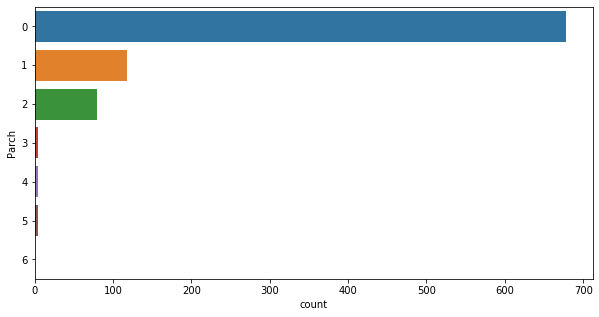

In [15]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y='Parch', data=train_set)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


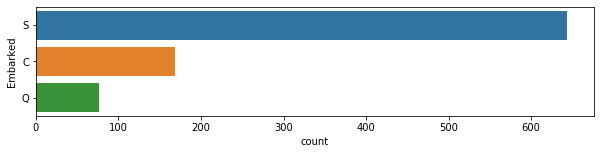

In [16]:
print(train_set.Embarked.value_counts())
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Embarked', data=train_set)

In [17]:
train_set.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
347088      6
3101295     6
           ..
350025      1
13568       1
113773      1
PC 17759    1
2697        1
Name: Ticket, Length: 681, dtype: int64

In [18]:
len(train_set.Ticket.unique())

681

In [19]:
train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
train_set = train_set.dropna(subset=['Embarked'])
train_set.shape

(889, 12)

In [21]:
X_train_all=train_set.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
X_test=test_set.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
Y_train_all=train_set['Survived']

In [22]:
Y_train_all.shape

(889,)

In [23]:
X_train_all.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [24]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [25]:
Y_train_all.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
X_train_all.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [27]:
X_train_lenc=X_train_all.copy()
X_test_lenc=X_test.copy()

In [28]:
s = (X_train_lenc.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Sex', 'Embarked']

In [99]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [29]:
for column in object_cols:
        X_test_lenc[column] = LabelEncoder().fit_transform(X_test_lenc[column])
for column in object_cols:
        X_train_lenc[column] = LabelEncoder().fit_transform(X_train_lenc[column])

In [30]:
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train_lenc))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test_lenc))

In [142]:
Y_train_all.shape

(889,)

In [31]:
imputed_X_train.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
dtype: object

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_X_lenc,val_X_lenc,train_y_lenc,val_y_lenc = train_test_split(imputed_X_train, Y_train_all, random_state = 0,test_size=0.2)

In [83]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500,max_depth=9,n_jobs=-1,random_state = 1)
rfr.fit(train_X_lenc,train_y_lenc)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [84]:
val_predictions_lenc = rfr.predict(val_X_lenc)
val_predictions_lenc = np.where(val_predictions_lenc > 0.5, 1, 0)

In [85]:
accuracy_score(val_y_lenc, val_predictions_lenc)

0.7808988764044944

In [86]:
rfr.fit(imputed_X_train, Y_train_all)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [87]:
y_predictions_lenc=rfr.predict(imputed_X_test)
y_predictions_lenc = np.where(y_predictions_lenc > 0.5, 1, 0)

In [88]:
y_predictions_lenc

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [90]:
ss1=pd.read_csv('gender_submission.csv')
ss1=ss1.drop('Survived',axis=1)
ss1['Survived']=y_predictions_lenc
ss1.to_csv('submission5.csv',index=False)

In [103]:
X_train_onhc=X_train_all.copy()
X_test_onhc=X_test.copy()

In [104]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train_onhc[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test_onhc[object_cols]))

In [109]:
OH_cols_train.index = X_train_onhc.index
OH_cols_test.index = X_test_onhc.index

In [111]:
num_X_train = X_train_onhc.drop(object_cols, axis=1)
num_X_test = X_test_onhc.drop(object_cols, axis=1)

In [112]:
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [117]:
OH_X_train.isnull().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
0           0
1           0
2           0
3           0
4           0
dtype: int64

In [126]:
my_imputer1 = SimpleImputer()
imputed_X_train_onhc = pd.DataFrame(my_imputer1.fit_transform(OH_X_train))
imputed_X_test_onhc = pd.DataFrame(my_imputer1.transform(OH_X_test))

In [127]:
train_X_onhc,val_X_onhc,train_y_onhc,val_y_onhc = train_test_split(imputed_X_train_onhc, Y_train_all, random_state = 0,test_size=0.2)

In [128]:
rfr1=RandomForestRegressor(n_estimators=500,max_depth=9,n_jobs=-1,random_state = 1)
rfr1.fit(train_X_onhc,train_y_onhc)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [129]:
val_predictions_onhc = rfr1.predict(val_X_onhc)
val_predictions_onhc = np.where(val_predictions_onhc > 0.5, 1, 0)

In [130]:
accuracy_score(val_y_onhc, val_predictions_onhc)

0.7808988764044944

In [131]:
rfr1.fit(imputed_X_train_onhc, Y_train_all)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [132]:
y_test_onhc=rfr1.predict(imputed_X_test_onhc)
y_test_onhc = np.where(y_test_onhc > 0.5, 1, 0)

In [133]:
ss1=pd.read_csv('gender_submission.csv')
ss1=ss1.drop('Survived',axis=1)
ss1['Survived']=y_test_onhc
ss1.to_csv('submission6.csv',index=False)